In [19]:
from sklearn.datasets.samples_generator import make_blobs
import sklearn.mixture as gmm


X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

model = gmm.GaussianMixture(n_components=4, warm_start=False, init_params = 'kmeans')
model.fit(X)
# print(model)
y_predict = model.predict(X)

# print(model.score(X, y_true))














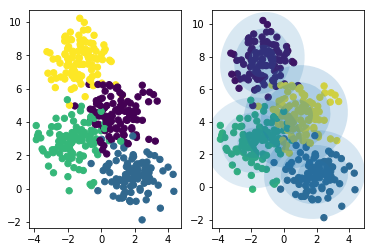

In [33]:
#Basado en: https://www.eduonix.com/dashboard/complete-guide-to-machine-learning-using-python
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import sklearn.mixture as gmm


X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1, random_state=0)

model = gmm.GaussianMixture(n_components=4, warm_start=False, init_params = 'kmeans')
model.fit(X)

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = y_true, s=40, cmap='viridis')
plt.axis('equal')

plt.subplot(1, 2, 2)
ax = plt.gca()

ax.scatter(X[:,0], X[:,1], c = y_predict, s=40, cmap='viridis')

ax.axis('equal')

w_factor = 0.2 / model.weights_.max()

for pos, covar, weights in zip(model.means_, model.covariances_, model.weights_):
    U, s, vt = np.linalg.svd(covar)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

#     # Draw the Ellipse
    for center in range(1, 4):
        ax.add_patch(Ellipse(pos, center * width, center * height, angle, alpha = weights * w_factor))

plt.show()
